In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST Original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [4]:
X, y = mnist['data'], mnist['target']



In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
784**.5

28.0

In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

In [10]:
import matplotlib

In [11]:
some_digit = X[69999]

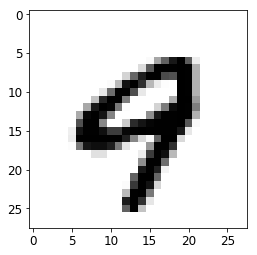

In [12]:
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)

In [13]:
y[69999]

9.0

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [15]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [16]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=100, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=100, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [18]:
sgd_clf.predict([X_train[4]])

array([False])

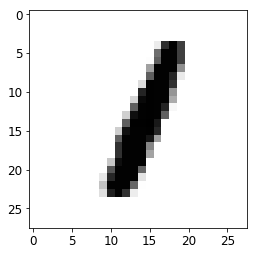

In [19]:
plt.imshow(X_train[4].reshape(28,28), cmap=plt.cm.binary)

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9625 , 0.96735, 0.9652 ])

In [21]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(y_train_5, y_train_pred)

array([[53611,   968],
       [ 1131,  4290]], dtype=int64)

In [37]:
from sklearn.metrics import precision_score, recall_score

In [39]:
precision_score(y_train_5, y_train_pred)

0.8158995815899581

In [40]:
recall_score(y_train_5, y_train_pred)

0.7913669064748201

In [43]:
from sklearn.metrics import f1_score

In [64]:
f1_score(y_train_5, y_train_pred)

0.8034460155445267

In [50]:
type(y_train_pred)

numpy.ndarray

In [76]:
mlist = [True for i in range(60000)]

In [74]:
mlist = np.asarray(mlist)
mlist

array([ True,  True,  True, ...,  True,  True,  True])

In [77]:
f1_score(y_train_5, mlist)

0.16572660154996102

In [78]:
type(mlist)

list

In [79]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [80]:
from sklearn.metrics import precision_recall_curve

In [83]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

(-50000, 50000)

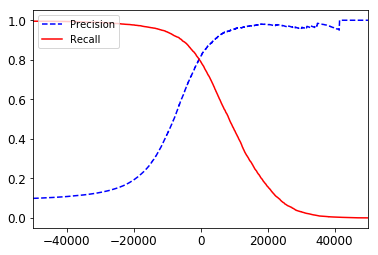

In [111]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "r-", label="Recall")
plt.legend(loc="upper left")
plt.xlim(-50000, 50000)

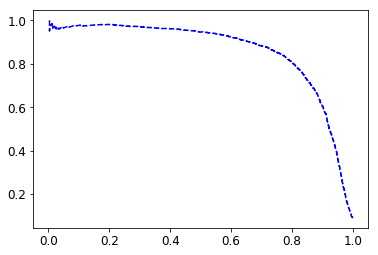

In [112]:
plt.plot(recalls, precisions, "b--", label="Precision")

In [115]:
plt.plot3d(precisions[:-1], recalls[:-1], thresholds, "b--", label="Precision")

AttributeError: module 'matplotlib.pyplot' has no attribute 'plot3d'

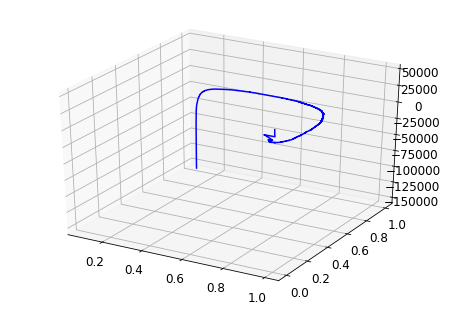

In [123]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()

ax = Axes3D(fig)
x = precisions[:-1]
y = recalls[:-1]
z = thresholds
ax.plot3D(x, y, z, 'blue', label = 'precisions')


In [124]:
from sklearn.metrics import roc_curve

In [125]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

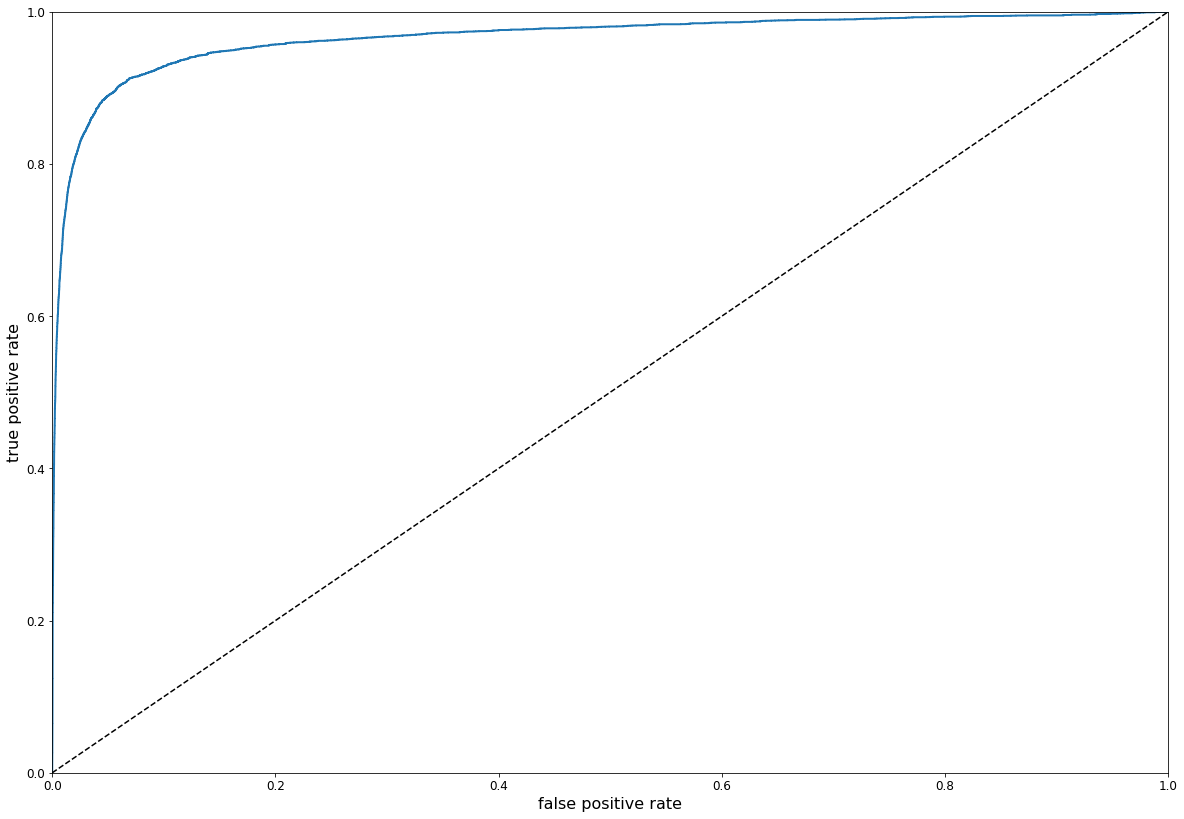

In [127]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('false positive rate', fontsize=16)
    plt.ylabel('true positive rate', fontsize=16)
plt.figure(figsize=(20, 14))
plot_roc_curve(fpr, tpr)


In [128]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [146]:
y_scores_forest = y_probas_forest[:, 1]

In [147]:
y_scores_forest.shape

(60000,)

In [148]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

In [149]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=100, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [153]:
sgd_clf.decision_function([some_digit])

array([[-21095.54886831, -45736.6764572 , -36820.86391869,
        -40062.18627133,    508.81232933, -21896.80375663,
        -31844.79454766, -22395.02896216, -18511.60178509,
         13382.1315349 ]])

In [154]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [155]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0.9]])

In [157]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87267546, 0.85169258, 0.81547232])

In [158]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [159]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.91321736, 0.91309565, 0.90953643])

In [160]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

In [161]:
conf_mx

array([[5695,    1,   19,    9,   11,   43,   45,    7,   88,    5],
       [   1, 6472,   46,   22,    6,   47,    5,    9,  120,   14],
       [  37,   32, 5355,   94,   77,   27,   77,   53,  194,   12],
       [  37,   29,  135, 5356,    2,  230,   30,   52,  171,   89],
       [  15,   21,   43,   11, 5341,    9,   51,   30,  122,  199],
       [  48,   34,   32,  187,   58, 4601,   88,   28,  256,   89],
       [  31,   23,   49,    2,   38,   95, 5598,    7,   75,    0],
       [  22,   15,   70,   30,   50,   11,    6, 5788,   35,  238],
       [  35,   98,   56,  128,    6,  141,   45,   14, 5240,   88],
       [  29,   26,   34,   80,  149,   35,    1,  192,  132, 5271]],
      dtype=int64)

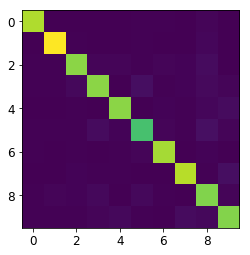

In [170]:
plt.imshow(conf_mx)

In [175]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

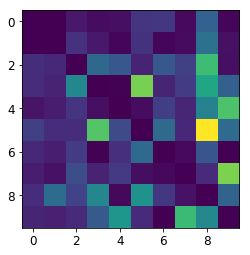

In [178]:
np.fill_diagonal(norm_conf_mx, 0)
plt.imshow(norm_conf_mx)

In [183]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [205]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd] #zips up the 2 arrays
y_multilabel
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [208]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [215]:
knn_clf.fit(X_train_mod, y_train_mod)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
digit_predict = knn_clf.predict(X_train_mod)

In [ ]:
plt.imshow()